In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import gzip
from scipy.io import mmread
import matplotlib.pyplot as plt
from bitstring import BitStream
import huffman

In [3]:
def load_data(dataset):
  datasets = ['humanBloodCells', 'humanKidneyCells', 'humanSkinCells']
  dataset_index = datasets.index(dataset)
  with gzip.open('./data/' + datasets[dataset_index] + '/matrix.mtx.gz', 'rt') as f:
    matrix = np.array(mmread(f).todense())
    features = pd.read_csv('./data/' + datasets[dataset_index] + '/features.tsv.gz', sep='\t')
    barcodes = pd.read_csv('./data/' + datasets[dataset_index] + '/barcodes.tsv.gz', sep='\t')
  return matrix, features, barcodes

In [4]:
matrix, features, barcodes = load_data('humanBloodCells')

In [5]:
def kmeans(matrix, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(matrix)

  # Identify cluster representatives
  min_dists = np.zeros(n_clusters)
  reps = np.array([-1 for i in range(n_clusters)])
  for i in range(matrix.shape[0]):
    curr_dist = np.linalg.norm(matrix[i] - kmeans.cluster_centers_[kmeans.labels_[i]])
    if reps[kmeans.labels_[i]] == -1 or curr_dist < min_dists[kmeans.labels_[i]]:
      min_dists[kmeans.labels_[i]] = curr_dist
      reps[kmeans.labels_[i]] = i

  # Get delta matrix
  delta_matrix = np.copy(matrix)
  for i in range(matrix.shape[0]):
    if reps[kmeans.labels_[i]] == i:
      continue
    delta_matrix[i] = matrix[i] - matrix[reps[kmeans.labels_[i]]]

  return reps, kmeans.labels_, delta_matrix

In [6]:
reps, labels, delta_matrix = kmeans(matrix, 10)

(array([2.0000000e+00, 0.0000000e+00, 2.0000000e+00, 1.5000000e+01,
        7.0700000e+02, 1.2921841e+07, 1.0824000e+04, 1.3360000e+03,
        4.3600000e+02, 2.2100000e+02, 1.0100000e+02, 6.5000000e+01,
        3.8000000e+01, 2.5000000e+01, 1.2000000e+01, 1.2000000e+01,
        5.0000000e+00, 8.0000000e+00, 4.0000000e+00, 5.0000000e+00,
        3.0000000e+00, 1.0000000e+00, 2.0000000e+00, 4.0000000e+00,
        3.0000000e+00, 2.0000000e+00, 0.0000000e+00, 4.0000000e+00,
        3.0000000e+00, 3.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        3.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 3.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 2.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

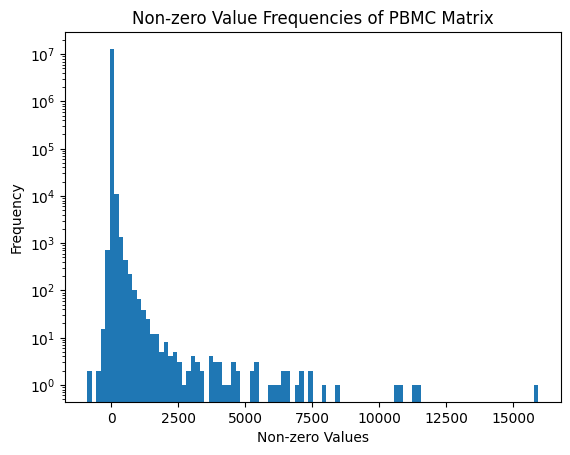

In [16]:
non_zero_vals = [i for i in delta_matrix.reshape(delta_matrix.size).tolist() if i != 0]
plt.xlabel('Non-zero Values')
plt.ylabel('Frequency')
plt.title(f'Non-zero Value Frequencies of PBMC Matrix')
plt.hist(non_zero_vals, bins=100, log=True)

In [11]:
def calc_wcss(matrix, reps, labels):
  wcss = 0
  for i in range(matrix.shape[0]):
    wcss += np.linalg.norm(matrix[i] - matrix[reps[labels[i]]])
  return wcss

In [23]:
k

50

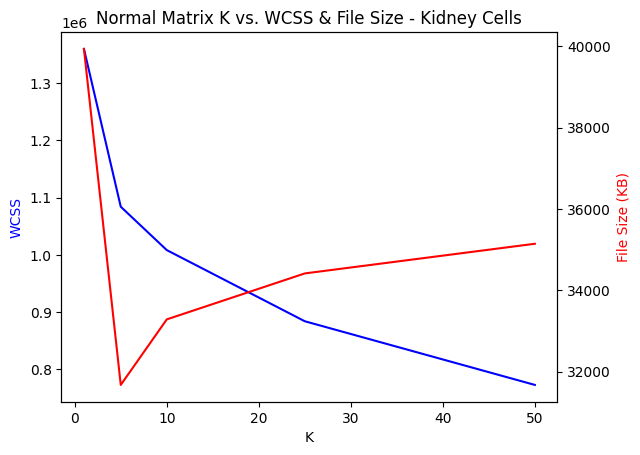

In [24]:
file_sizes = [39935, 31675, 33286, 34416, 35145]
wcss_vals = []
k_vals = [1, 5, 10, 25, 50]
for k in k_vals:
  reps, labels, delta_matrix = kmeans(matrix, k)
  wcss_vals.append(float(calc_wcss(matrix, reps, labels)))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Normal Matrix K vs. WCSS & File Size - Kidney Cells')
ax1.set_xlabel('K')

ax1.set_ylabel('WCSS', color='blue')
ax1.plot(k_vals, wcss_vals, color='blue')

ax2.set_ylabel('File Size (KB)', color='red')
ax2.plot(k_vals, file_sizes, color='red')

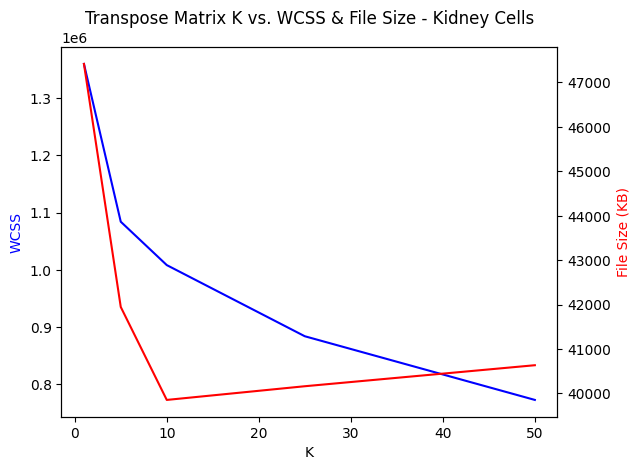

In [25]:
file_sizes = [47416, 41946, 39854, 40162, 40635]
wcss_vals = []
k_vals = [1, 5, 10, 25, 50]
for k in k_vals:
  reps, labels, delta_matrix = kmeans(matrix, k)
  wcss_vals.append(float(calc_wcss(matrix, reps, labels)))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Transpose Matrix K vs. WCSS & File Size - Kidney Cells')
ax1.set_xlabel('K')

ax1.set_ylabel('WCSS', color='blue')
ax1.plot(k_vals, wcss_vals, color='blue')

ax2.set_ylabel('File Size (KB)', color='red')
ax2.plot(k_vals, file_sizes, color='red')

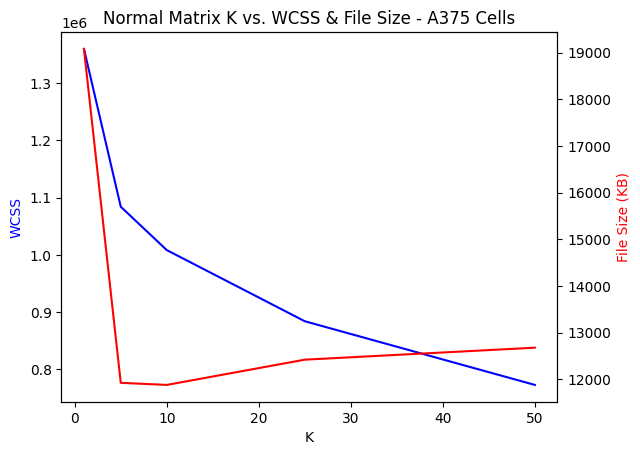

In [26]:
file_sizes = [19081, 11927, 11882, 12423, 12680]
wcss_vals = []
k_vals = [1, 5, 10, 25, 50]
for k in k_vals:
  reps, labels, delta_matrix = kmeans(matrix, k)
  wcss_vals.append(float(calc_wcss(matrix, reps, labels)))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Normal Matrix K vs. WCSS & File Size - A375 Cells')
ax1.set_xlabel('K')

ax1.set_ylabel('WCSS', color='blue')
ax1.plot(k_vals, wcss_vals, color='blue')

ax2.set_ylabel('File Size (KB)', color='red')
ax2.plot(k_vals, file_sizes, color='red')

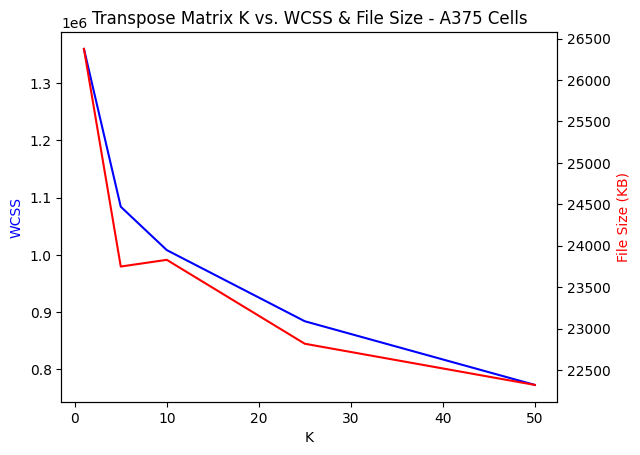

In [27]:
file_sizes = [26375, 23748, 23829, 22816, 22319]
wcss_vals = []
k_vals = [1, 5, 10, 25, 50]
for k in k_vals:
  reps, labels, delta_matrix = kmeans(matrix, k)
  wcss_vals.append(float(calc_wcss(matrix, reps, labels)))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Transpose Matrix K vs. WCSS & File Size - A375 Cells')
ax1.set_xlabel('K')

ax1.set_ylabel('WCSS', color='blue')
ax1.plot(k_vals, wcss_vals, color='blue')

ax2.set_ylabel('File Size (KB)', color='red')
ax2.plot(k_vals, file_sizes, color='red')

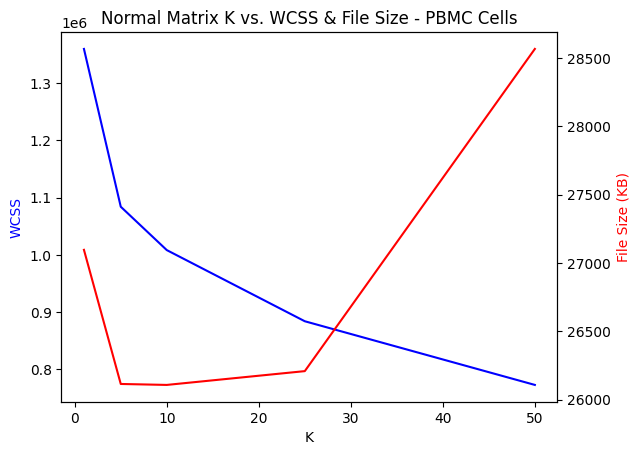

In [28]:
file_sizes = [27096, 26114, 26107, 26208, 28567]
wcss_vals = []
k_vals = [1, 5, 10, 25, 50]
for k in k_vals:
  reps, labels, delta_matrix = kmeans(matrix, k)
  wcss_vals.append(float(calc_wcss(matrix, reps, labels)))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Normal Matrix K vs. WCSS & File Size - PBMC Cells')
ax1.set_xlabel('K')

ax1.set_ylabel('WCSS', color='blue')
ax1.plot(k_vals, wcss_vals, color='blue')

ax2.set_ylabel('File Size (KB)', color='red')
ax2.plot(k_vals, file_sizes, color='red')

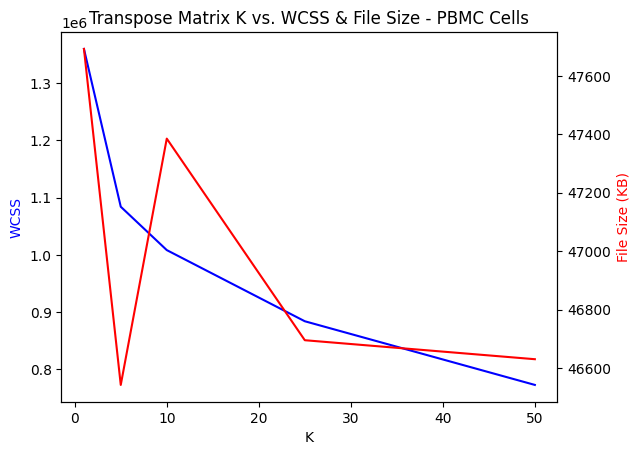

In [33]:
file_sizes = [47692, 46542, 47385, 46695, 46630]
wcss_vals = []
k_vals = [1, 5, 10, 25, 50]
for k in k_vals:
  reps, labels, delta_matrix = kmeans(matrix, k)
  wcss_vals.append(float(calc_wcss(matrix, reps, labels)))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Transpose Matrix K vs. WCSS & File Size - PBMC Cells')
ax1.set_xlabel('K')

ax1.set_ylabel('WCSS', color='blue')
ax1.plot(k_vals, wcss_vals, color='blue')

ax2.set_ylabel('File Size (KB)', color='red')
ax2.plot(k_vals, file_sizes, color='red')

(array([4.6493396e+07, 0.0000000e+00, 2.2195791e+07, 0.0000000e+00,
        0.0000000e+00, 1.1725197e+07, 0.0000000e+00, 5.6058490e+06,
        0.0000000e+00, 0.0000000e+00, 2.6423730e+06, 0.0000000e+00,
        0.0000000e+00, 1.2902650e+06, 0.0000000e+00, 6.2529800e+05,
        0.0000000e+00, 0.0000000e+00, 3.4663500e+05, 0.0000000e+00,
        0.0000000e+00, 1.4232000e+05, 0.0000000e+00, 7.8982000e+04,
        0.0000000e+00, 0.0000000e+00, 4.1932000e+04, 0.0000000e+00,
        2.5255000e+04, 0.0000000e+00, 0.0000000e+00, 7.7720000e+03,
        0.0000000e+00, 0.0000000e+00, 8.3410000e+03, 0.0000000e+00,
        7.4800000e+02, 0.0000000e+00, 0.0000000e+00, 3.1000000e+02,
        0.0000000e+00, 0.0000000e+00, 1.4700000e+02, 0.0000000e+00,
        6.5000000e+01, 0.0000000e+00, 0.0000000e+00, 2.6000000e+01,
        0.0000000e+00, 0.0000000e+00, 1.4000000e+01, 0.0000000e+00,
        5.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.0000000e+00,
        0.0000000e+00, 7.0000000e+00, 0.0000000e

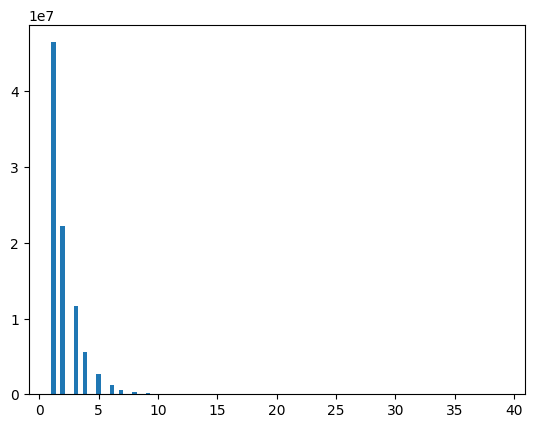

In [32]:
run_lengths = np.load('./results/humanBloodCells/huffman_vals_only_run_lengths.npy')
plt.hist(run_lengths, bins=100)

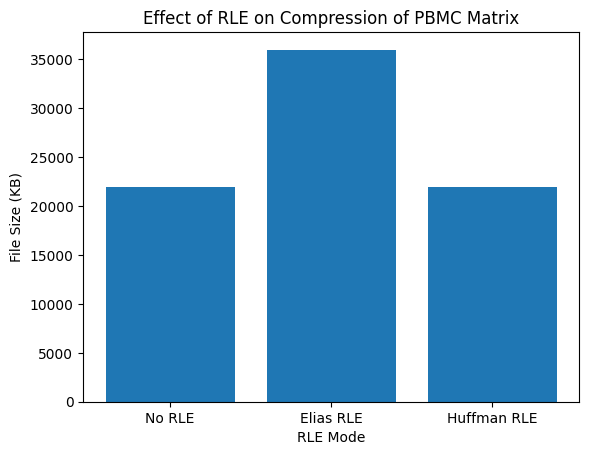

In [36]:
rle_mode = ['No RLE', 'Elias RLE', 'Huffman RLE']
file_sizes = [21933, 35996, 21933]

plt.bar(rle_mode, file_sizes)
plt.title('Effect of RLE on Compression of PBMC Matrix')
plt.xlabel('RLE Mode')
plt.ylabel('File Size (KB)')
plt.show()

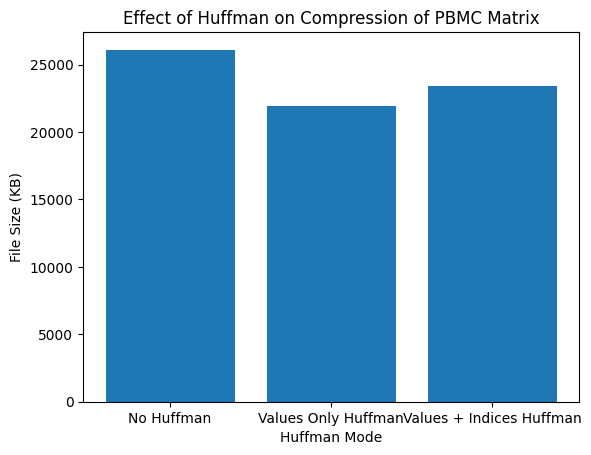

In [38]:
huffman_mode = ['No Huffman', 'Values Only Huffman', 'Values + Indices Huffman']
file_sizes = [26107, 21933, 23443]

plt.bar(huffman_mode, file_sizes)
plt.title('Effect of Huffman on Compression of PBMC Matrix')
plt.xlabel('Huffman Mode')
plt.ylabel('File Size (KB)')
plt.show()